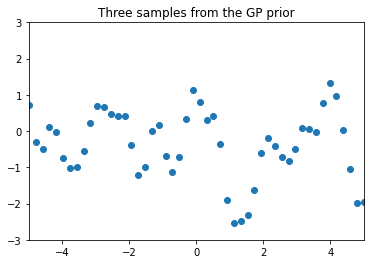

In [10]:
import numpy as np
import matplotlib.pyplot as pl

# Test data
n = 50
Xtest = np.linspace(-5, 5, n).reshape(-1,1)

# Define the kernel function
def kernel(a, b, param):
    sqdist = np.sum(a**2,1).reshape(-1,1) + np.sum(b**2,1) - 2*np.dot(a, b.T)
    return np.exp(-.5 * (1/param) * sqdist)

param = 0.1
K_ss = kernel(Xtest, Xtest, param)

# Get cholesky decomposition (square root) of the
# covariance matrix
L = np.linalg.cholesky(K_ss + 1e-15*np.eye(n))
# Sample 3 sets of standard normals for our test points,
# multiply them by the square root of the covariance matrix
f_prior = np.dot(L, np.random.normal(size=(n,3)))

# Now let's plot the 3 sampled functions.
pl.scatter(Xtest, f_prior[:,0])
pl.axis([-5, 5, -3, 3])
pl.title('Three samples from the GP prior')
pl.show()

In [11]:
def exponential_cov(x, y, params):
    return params[0] * np.exp( -0.5 * params[1] * np.subtract.outer(x, y)**2)

In [12]:
def conditional(x_new, x, y, params):
    B = exponential_cov(x_new, x, params)
    C = exponential_cov(x, x, params)
    A = exponential_cov(x_new, x_new, params)
    mu = np.linalg.inv(C).dot(B.T).T.dot(y)
    sigma = A - B.dot(np.linalg.inv(C).dot(B.T))
    return(mu.squeeze(), sigma.squeeze())

In [13]:
# Define the GP prior
def gp_prior(x, params):
    K_ss = exponential_cov(x, x, params)
    L = np.linalg.cholesky(K_ss + 1e-15*np.eye(n))
    f_prior = np.dot(L, np.random.normal(size=(n,3)))
    return f_prior

# sample from the GP prior
f_prior = gp_prior(Xtest, [1, 0.1])

# A function tat predicts the GP posterior
def gp_posterior(x, y, params):
    K_ss = exponential_cov(x, x, params)
    K_sn = exponential_cov(x, x_new, params)
    K_ns = exponential_cov(x_new, x, params)
    K_nn = exponential_cov(x_new, x_new, params)
    K_ss_inv = np.linalg.inv(K_ss)
    mu = K_ns.T.dot(K_ss_inv).dot(y)
    sigma = K_nn - K_ns.T.dot(K_ss_inv).dot(K_sn)
    return(mu.squeeze(), sigma.squeeze())


LinAlgError: Matrix is not positive definite